In [1]:
import sys
# add parent directory and its parent to sys.path so that python finds the modules
sys.path.extend(['..', '../..'])

# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import contextily as cx

from db_utils_viz import get_rect_data

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# rect_coords = (13.315518,52.5073,13.340082,52.51698) #erp
rect_coords = (13.411647,52.496276,13.422113,52.501871)
df = get_rect_data(rect_coords, limit_rows=10)

Number of rows: 79548
Number of rides: 148


In [3]:
df.rename({'filename': 'ride_id'}, axis='columns', inplace=True)

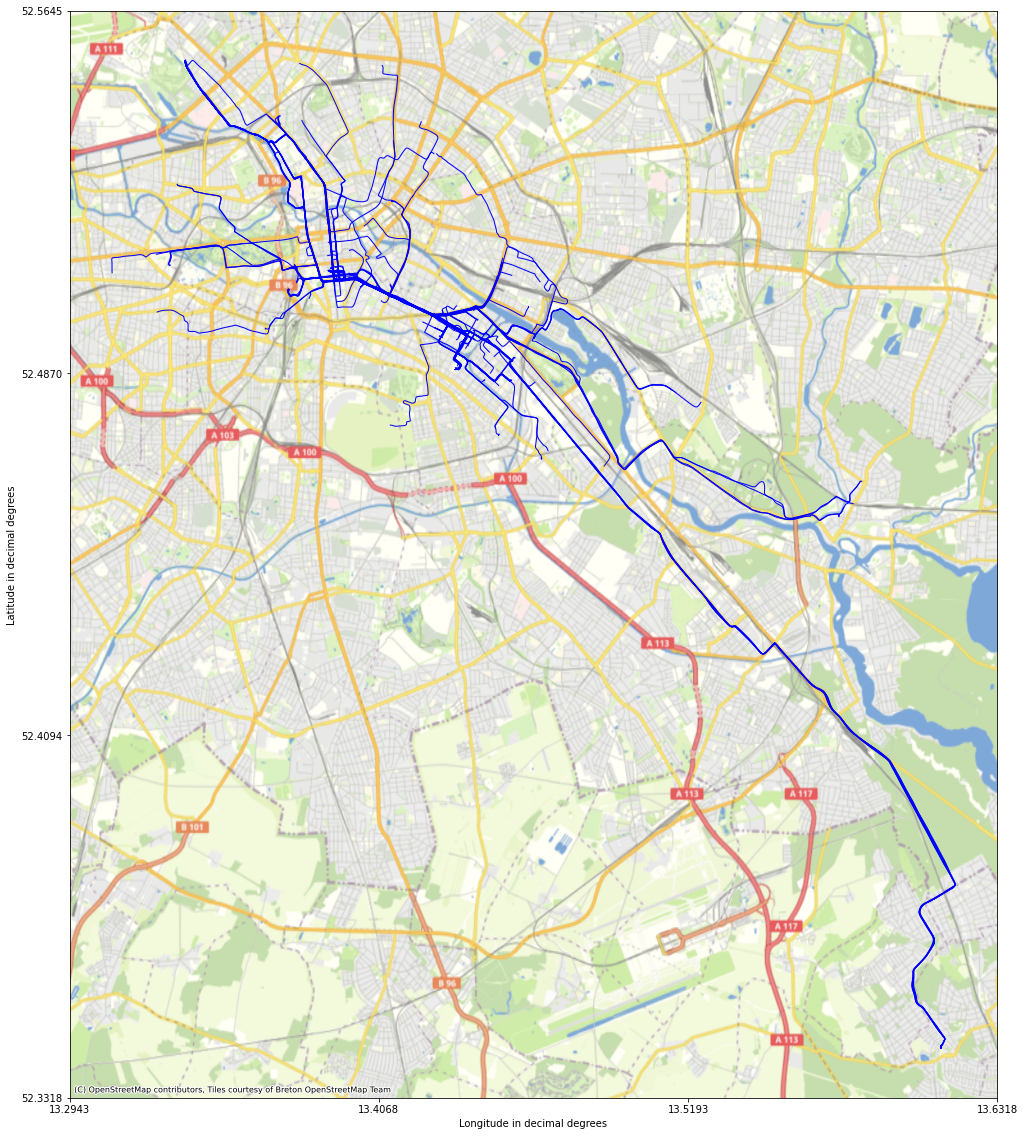

In [5]:
ride_data = {'df': df}
fig, ax = plt.subplots(figsize=(20, 20))

# plot rides for each dataframe
for data_idx, (data_name, df) in enumerate(ride_data.items()):
    df_grouped = df.groupby('ride_id')
    for ride_group_name in df_grouped.groups:
        df_ride_group = df_grouped.get_group(ride_group_name)
        ax.plot(df_ride_group.lon, df_ride_group.lat, color='blue', linewidth=1)
        # add labels to legend

ax.xaxis.set_major_locator(ticker.LinearLocator(4))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.set_major_locator(ticker.LinearLocator(4))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.set_xlabel('Longitude in decimal degrees')
ax.set_ylabel('Latitude in decimal degrees')

cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.OpenStreetMap.DE, zoom=18)
ax.set_xlim(rect_coords[0], rect_coords[2])
ax.set_ylim(rect_coords[1], rect_coords[3])

ax.set_aspect(1.7)

# plt.legend()
#plt.savefig('simra_data_viz.png')
plt.show()

